# Testing out mock community 12-02-2024

Example jupyter notebook for tax-credit mock community analysis.

## Format mock community data  

Expected results are needed for each mock community. These should be organized in separate folders, and the names of the folders should match variable names provided in the code below. You need the expected taxonomies based on each reference database for each mock community.  

If you just want to evaluate Taxon Detection Rates, you can provide the expected relative proportion of each taxon. If you want stats like Precision and Recall, you need to provide "trueish" taxonomies for each ASV sequence.  

```
mock-community/
    mock-1/
        feature_table.biom
        database-1/
            expected/
                expected-taxonomy.tsv #tsv of expected read counts or proportions collapsed by taxonomy
                table*biom # Read count table collapsed by taxonomy,e.g., table.L6-taxa.biom
                trueish-taxonomies.tsv # expected taxonomy for each ASV sequence
        database-2/
            expected/
                ...

```
        
Let's look at these files:

In [166]:
# expected-taxonomy.tsv 
! head data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/expected-taxonomy.tsv

Taxon	MP_ERR3712072	MP_ERR3712077
Eukaryota;Haptista;Haptophyta;NA;Prymnesiophyceae;Prymnesiales;NA;NA;NA	32153	73024
Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;NA;NA;NA;NA	22820	39622
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;NA;NA;NA;NA	6109	5246
Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodiscophyceae;NA;NA;NA;NA	3404	7127
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Lingulodiniaceae;Lingulodinium;NA	0	8738
Eukaryota;TSAR;Rhizaria;Radiolaria;Polycystinea;Spumellaria;Pyloniidae;Larcopyle;NA	4960	3494
Eukaryota;TSAR;Rhizaria;Cercozoa;Filosa-Thecofilosea;Cryomonadida;NA;NA;NA	2001	2873
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gymnodiniales;Gymnodiniaceae;Gymnodinium;NA	0	4332
Eukaryota;TSAR;Alveolata;Ciliophora;Spirotrichea;Oligotrichida;NA;NA;NA	3280	328


In [167]:
# trueish-taxonomies.tsv
! head data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/trueish-taxonomies.tsv

id	taxonomy
ASV_1	Eukaryota;Haptista;Haptophyta;NA;Prymnesiophyceae;Prymnesiales;NA;NA;NA
ASV_2	Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;NA;NA;NA;NA
ASV_3	Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;NA;NA;NA;NA
ASV_4	Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;NA;NA;NA;NA
ASV_5	Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodiscophyceae;NA;NA;NA;NA
ASV_6	Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Lingulodiniaceae;Lingulodinium;NA
ASV_7	Eukaryota;TSAR;Rhizaria;Radiolaria;Polycystinea;Spumellaria;Pyloniidae;Larcopyle;NA
ASV_8	Eukaryota;TSAR;Rhizaria;Cercozoa;Filosa-Thecofilosea;Cryomonadida;NA;NA;NA
ASV_9	Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gymnodiniales;Gymnodiniaceae;Gymnodinium;NA


### Convert .tsv read count file to biom  

#### feature_table.biom  

This is a biom formatted file of the ASV read counts. It does NOT include expected taxonomy. 

```
mock-community/
    mock-1/
        feature_table.biom
```



In [ ]:
! biom convert -i data/mock-community/Fuhrman_18Sv4_counts.tsv -o data/mock-community/fuhrman_18Sv4/feature_table.biom --to-hdf5 --table-type="OTU table"

#### Collapsed taxa biom files
Need a collapsed biom file with taxonomy in 1st column, then proportions for each sample. Put this is a folder with dataset/database/expected/expected-taxonomy.tsv 

Activate qiime2 conda env  

```
conda activate qiime2-amplicon-2024.10
```  

Convert tsv to biom  

In [ ]:
# format of collapsed taxonomy file
! head data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/expected-taxonomy.tsv

Taxon	MP_ERR3712072	MP_ERR3712077
Eukaryota;Haptista;Haptophyta;NA;Prymnesiophyceae;Prymnesiales;NA;NA;NA	32153	73024
Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;NA;NA;NA;NA	22820	39622
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;NA;NA;NA;NA	6109	5246
Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodiscophyceae;NA;NA;NA;NA	3404	7127
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Lingulodiniaceae;Lingulodinium;NA	0	8738
Eukaryota;TSAR;Rhizaria;Radiolaria;Polycystinea;Spumellaria;Pyloniidae;Larcopyle;NA	4960	3494
Eukaryota;TSAR;Rhizaria;Cercozoa;Filosa-Thecofilosea;Cryomonadida;NA;NA;NA	2001	2873
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gymnodiniales;Gymnodiniaceae;Gymnodinium;NA	0	4332
Eukaryota;TSAR;Alveolata;Ciliophora;Spirotrichea;Oligotrichida;NA;NA;NA	3280	328


In [ ]:
# functiom to clean up taxa strings and make biom file 
def amend_biom_taxonomy_ids(biom_table,
                            empty_taxonomy=['k__', 'p__', 'c__', 'o__',
                                            'f__', 'g__', 's__'],
                            clean_obs_ids=True):
    '''Convert biom table taxonomy strings so that strings with incomplete
    taxonomies are filled out with ambiguous labels
    '''
    if clean_obs_ids is True:
        clean_taxonomy_ids(biom_table)

    new_ids = {}
    for taxa in biom_table.ids(axis='observation'):
        old_taxonomy = taxa.split(';')
        if len(old_taxonomy) < len(empty_taxonomy):
            new_taxonomy = empty_taxonomy
            for i in range(len(old_taxonomy)):
                new_taxonomy[i] = old_taxonomy[i]
            new_ids[taxa] = ';'.join(new_taxonomy)
        else:
            new_ids[taxa] = ';'.join(old_taxonomy)

    return biom_table.update_ids(new_ids, axis='observation')

def clean_taxonomy_ids(table, delete_chars='[]()'):
    new_ids = {obs_id: obs_id.translate(str.maketrans('', '', delete_chars))
               for obs_id in table.ids(axis="observation")}
    return table.update_ids(new_ids, axis='observation')

Run this code for each mock community and each database

In [82]:
# copy expected taxonomy.tsv and convert to biom
exp_taxa_fp = "data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/expected-taxonomy.tsv"
exp_biom_fp = "data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/table.L6-taxa.biom"

newbiom = amend_biom_taxonomy_ids(load_table(exp_taxa_fp))
# add taxonomy ids (names) as observation metadata
metadata = {sid: {'taxonomy': sid.split(';')}
            for sid in newbiom.ids(axis='observation')}
newbiom.add_metadata(metadata, 'observation')
write_biom_table(newbiom, 'hdf5', exp_biom_fp)

In [83]:
# copy expected taxonomy.tsv and convert to biom
exp_taxa_fp = "data/mock-community/fuhrman_18Sv4/rcrux-18sv4/expected/expected-taxonomy.tsv"
exp_biom_fp = "data/mock-community/fuhrman_18Sv4/rcrux-18sv4/expected/table.L6-taxa.biom"

newbiom = amend_biom_taxonomy_ids(load_table(exp_taxa_fp))
# add taxonomy ids (names) as observation metadata
metadata = {sid: {'taxonomy': sid.split(';')}
            for sid in newbiom.ids(axis='observation')}
newbiom.add_metadata(metadata, 'observation')
write_biom_table(newbiom, 'hdf5', exp_biom_fp)

### Add fasta file of ASV sequences   

```
mock-community/
    mock-1/
        rep_seqs.fna
```

In [ ]:
%%bash
# cp data/mock/Fuhrman_18Sv4_ASVs.fasta data/mock/fuhrman_18Sv4/rep_seqs.fna
# convert to qiime because that's what we're using for taxa assignment
qiime tools import \
--type 'FeatureData[Sequence]' \
--input-path data/mock-community/fuhrman_18Sv4/rep_seqs.fna \
    --output-path data/mock-community/fuhrman_18Sv4/rep_seqs.qza 


Imported data/mock-community/fuhrman_18Sv4/rep_seqs.fna as DNASequencesDirectoryFormat to data/mock-community/fuhrman_18Sv4/rep_seqs.qza


### Format expected taxonomy  

Should have the headers Taxonomy\tStandard Taxonomy?

I think this is supposed to just be for the expected_sequences.fasta... 

In [ ]:
! head data/original_files/Furhman_18Sv4_taxa_pr2.tsv

Feature.ID	Taxon
ASV_1	Eukaryota;Haptista;Haptophyta;NA;Prymnesiophyceae;Prymnesiales;NA;NA;NA
ASV_2	Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;NA;NA;NA;NA
ASV_3	Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;NA;NA;NA;NA
ASV_4	Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;NA;NA;NA;NA
ASV_5	Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodiscophyceae;NA;NA;NA;NA
ASV_6	Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Lingulodiniaceae;Lingulodinium;NA
ASV_7	Eukaryota;TSAR;Rhizaria;Radiolaria;Polycystinea;Spumellaria;Pyloniidae;Larcopyle;NA
ASV_8	Eukaryota;TSAR;Rhizaria;Cercozoa;Filosa-Thecofilosea;Cryomonadida;NA;NA;NA
ASV_9	Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gymnodiniales;Gymnodiniaceae;Gymnodinium;NA


In [ ]:
%%bash
# do for each mock and each database
sed '1s/.*/id\ttaxonomy/' data/original_files/Furhman_18Sv4_taxa_pr2.tsv > data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/trueish-taxonomies.tsv

sed '1s/.*/id\ttaxonomy/' data/original_files/Furhman_18Sv4_taxa_blast.tsv > data/mock-community/fuhrman_18Sv4/rcrux-18sv4/expected/trueish-taxonomies.tsv

### Format reference databases  

Make sure your reference databases are organized, with a fasta file and taxonomy file. They can have whatever name you want. Make sure they are in the format needed for your taxa assignments (eg, .qza if using qiime, correct headers)

Requirements:  
**fasta file**: no lower case sequences  
**taxonomy file**: Feature ID\tTaxon header (required for qiime2), no quotes, no repeated accession ids  

```
ref_dbs/
    database-1/
        ref-seqs.fna
        ref-tax.tsv
        ref_seqs.qza
        ref_tax.qza

In [5]:
%%bash
#rcrux-18sv4
echo -e "Feature ID\tTaxon">tmp.txt
sed 's/\"//g' data/ref_dbs/rcrux-18sv4/18s_V4_derep_and_clean_taxonomy.txt >> tmp.txt
mv tmp.txt data/ref_dbs/rcrux-18sv4/18s_V4_derep_and_clean_taxonomy.txt

In [4]:
%%bash
# now import to qiime2 artifacts 
    qiime tools import \
    --type 'FeatureData[Sequence]' \
    --input-path data/ref_dbs/rcrux-18sv4/18s_V4_derep_and_clean.fasta \
    --output-path data/ref_dbs/rcrux-18sv4/ref_seqs.qza 
  

Imported data/ref_dbs/rcrux-18sv4/18s_V4_derep_and_clean.fasta as DNASequencesDirectoryFormat to data/ref_dbs/rcrux-18sv4/ref_seqs.qza


In [5]:
%%bash
# now import to qiime2 artifacts 
    qiime tools import \
    --type 'FeatureData[Taxonomy]' \
    --input-path data/ref_dbs/rcrux-18sv4/18s_V4_derep_and_clean_taxonomy.txt \
    --output-path data/ref_dbs/rcrux-18sv4/ref_tax.qza 
  

Imported data/ref_dbs/rcrux-18sv4/18s_V4_derep_and_clean_taxonomy.txt as TSVTaxonomyDirectoryFormat to data/ref_dbs/rcrux-18sv4/ref_tax.qza


## Assign taxonomy  
Based on [this notebook](https://github.com/caporaso-lab/tax-credit/blob/a1878884f62d60b8ba9dcc6c6ef4a9c8fdc0d917/ipynb/mock-community/taxonomy-assignment-blast%2B.ipynb)

In [156]:
# need the tax-credit code to be in the same directory as the notebook
from os.path import join, expandvars 
from joblib import Parallel, delayed
from glob import glob
from os import system
from tax_credit.framework_functions import (parameter_sweep,
                                            generate_per_method_biom_tables,
                                            move_results_to_repository)


In [157]:
! pwd

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro


In [158]:
project_dir = "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro"
analysis_name= "mock-community" # must use this name for plotting code to work
data_dir = join(project_dir, "data", analysis_name)# where the mock community data is stored

reference_database_dir = "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs"
results_dir = expandvars("/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community")

### Preparing data to sweep  
First, we're going to define the data sets that we'll sweep over. 

In [159]:
# format is mock community name and reference database name
dataset_reference_combinations = [
 ('fuhrman_18Sv4', 'pr2-ssu'), 
 ('fuhrman_18Sv4', 'rcrux-18sv4')]

# format is path to sequences, path to taxonomy

reference_dbs = {'pr2-ssu' : (join(reference_database_dir, 'pr2-ssu/pr2_version_5.0.0_SSU_seqs.qza'),
                            join(reference_database_dir, 'pr2-ssu/pr2_version_5.0.0_SSU_tax.qza')),
                 'rcrux-18sv4' : (join(reference_database_dir, 'rcrux-18sv4/ref_seqs.qza'), 
                                   join(reference_database_dir, 'rcrux-18sv4/ref_tax.qza'))}

### Preparing the method/parameter combinations and generating commands
Now we set the methods and method-specific parameters that we want to sweep. Modify to sweep other methods. Note how method_parameters_combinations feeds method/parameter combinations to parameter_sweep() in the cell below.

Here we provide an example of taxonomy assignment using classifiers executed on the command line. To accomplish this, we must first convert commands to a string, which we then pass to bash for execution. we must also activate a separate environment in which QIIME2 has been installed if not installed in the tax-credit environment. If any environmental variables need to be set (in this example, the RDP_JAR_PATH), we must also source the .bashrc file.  

Now enter the template of the command to sweep, and generate a list of commands with parameter_sweep().

Fields must adhere to following format:

                  {0} = output directory
                  {1} = input data
                  {2} = output destination
                  {3} = reference taxonomy
                  {4} = method name
                  {5} = other parameters

## Blast

In [ ]:
method_parameters_combinations = {
              'blast+' : {'p-evalue': [0.001],
                          'p-maxaccepts': [1, 10],
                          'p-perc-identity': [0.80, 0.97],
                          'p-min-consensus': [0.51, 0.75]}
             }

command_template = ("mkdir -p {0}; "
                    "qiime feature-classifier classify-consensus-blast --i-query {1} --o-classification "
                    "{0}/rep_seqs_tax_assignments.qza --i-reference-reads {2} --i-reference-taxonomy {3} {5} --o-search-results {0}/top_blast_hits.qza ; "
                    "qiime tools export --input-path {0}/rep_seqs_tax_assignments.qza --output-path {0}/query_tax_assignments.txt --output-format TSVTaxonomyFormat;")


commands = parameter_sweep(data_dir, results_dir, reference_dbs,
                           dataset_reference_combinations,
                           method_parameters_combinations, command_template,
                           infile='rep_seqs.qza', output_name='rep_seqs_tax_assignments.qza')

In [45]:
# sanity check, do commands look ok?
print(len(commands))
print(commands[0])

16
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8; qiime feature-classifier classify-consensus-blast --i-query /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/rep_seqs_tax_assignments.qza --i-reference-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_seqs.qza --i-reference-taxonomy /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_tax.qza --p-evalue 0.001 --p-maxaccepts 1 --p-min-consensus 0.51 --p-perc-identity 0.8 --o-search-results /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/top_bl

In [ ]:
Parallel(n_jobs=4)(delayed(system)(command) for command in commands)

Example of a full command:  
```
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8
qiime feature-classifier classify-consensus-blast --i-query /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza \
--o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/rep_seqs_tax_assignments.qza \
--i-reference-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_seqs.qza --i-reference-taxonomy /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_tax.qza \
--p-evalue 0.001 --p-maxaccepts 1 --p-min-consensus 0.51 --p-perc-identity 0.8 \
--o-search-results /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/top_blast_hits.qza
qiime tools export --input-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/rep_seqs_tax_assignments.qza \
--output-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/query_tax_assignments.txt --output-format TSVTaxonomyFormat;
```


In [59]:
taxonomy_glob = join(results_dir, '*', '*', '*', '*', 'query_tax_assignments.txt')
generate_per_method_biom_tables(taxonomy_glob, data_dir)

## Naive Bayes

In [ ]:
method_parameters_combinations = {
    'naive-bayes' : {'p-feat-ext--ngram-range': 
                     ['[7,7]','[10,10]']}
}

command_template = ('mkdir -p "{0}"; '
                    'qiime feature-classifier fit-classifier-naive-bayes --o-classifier '
                    '"{0}/classifier.qza" --i-reference-reads {2} --i-reference-taxonomy {3} {5}; ')

confidences = [0.5, 0.7, 0.9]
command_template += ''.join(
    'mkdir -p "{0}:' + str(c) + '"; '
    'qiime feature-classifier classify-sklearn '
    '--o-classification "{0}:' + str(c) + '/rep_seqs_tax_assignments.qza" '
    '--i-classifier "{0}/classifier.qza" '
    '--i-reads {1} --p-confidence ' + str(c) + '; '
    'qiime tools export --input-path "{0}:' + str(c) + '/rep_seqs_tax_assignments.qza" --output-path "{0}:' + str(c) + '/taxonomy.tsv" --output-format TSVTaxonomyFormat; '
    'mv "{0}:' + str(c) + '/taxonomy.tsv" "{0}:' + str(c) + '/query_tax_assignments.txt"; 'for c in confidences)

command_template += 'rm "{0}/classifier.qza"; rmdir "{0}"'

commands = parameter_sweep(data_dir, results_dir, reference_dbs,
                           dataset_reference_combinations,
                           method_parameters_combinations, command_template,
                           infile='rep_seqs.qza', output_name='rep_seqs_tax_assignments.qza')

In [161]:
# sanity check, do commands look ok?
print(len(commands))
print(commands[0])

4
mkdir -p "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]"; qiime feature-classifier fit-classifier-naive-bayes --o-classifier "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza" --i-reference-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_seqs.qza --i-reference-taxonomy /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_tax.qza; mkdir -p "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5"; qiime feature-classifier classify-sklearn --o-classification "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/rep_seqs_tax_assignments.qza" --i-classifier 

### Run commands

In [ ]:
Parallel(n_jobs=5)(delayed(system)(command) for command in commands);

In [169]:
%%bash
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]

qiime feature-classifier fit-classifier-naive-bayes \
--o-classifier /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza \
--i-reference-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_seqs.qza --i-reference-taxonomy /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs/pr2-ssu/pr2_version_5.0.0_SSU_tax.qza


Saved TaxonomicClassifier to: /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza


In [172]:
%%bash
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5;
qiime feature-classifier classify-sklearn --o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/rep_seqs_tax_assignments.qza --p-n-jobs 5 --i-classifier /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza \
--i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.5

qiime tools export --input-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/rep_seqs_tax_assignments.qza \
--output-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/taxonomy.tsv --output-format TSVTaxonomyFormat
mv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/taxonomy.tsv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/query_tax_assignments.txt; 




Saved FeatureData[Taxonomy] to: /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/rep_seqs_tax_assignments.qza
Exported /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/rep_seqs_tax_assignments.qza as TSVTaxonomyFormat to file /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.5/taxonomy.tsv


In [173]:
%%bash
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7;
qiime feature-classifier classify-sklearn --o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/rep_seqs_tax_assignments.qza --p-n-jobs 5 --i-classifier /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza \
--i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.7

qiime tools export --input-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/rep_seqs_tax_assignments.qza \
--output-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/taxonomy.tsv --output-format TSVTaxonomyFormat
mv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/taxonomy.tsv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/query_tax_assignments.txt; 




Saved FeatureData[Taxonomy] to: /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/rep_seqs_tax_assignments.qza
Exported /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/rep_seqs_tax_assignments.qza as TSVTaxonomyFormat to file /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/taxonomy.tsv


In [174]:
%%bash
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9;
qiime feature-classifier classify-sklearn --o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/rep_seqs_tax_assignments.qza --p-n-jobs 5 --i-classifier /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza \
--i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.9

qiime tools export --input-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/rep_seqs_tax_assignments.qza \
--output-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/taxonomy.tsv --output-format TSVTaxonomyFormat
mv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/taxonomy.tsv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/query_tax_assignments.txt; 




Saved FeatureData[Taxonomy] to: /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/rep_seqs_tax_assignments.qza
Exported /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/rep_seqs_tax_assignments.qza as TSVTaxonomyFormat to file /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/taxonomy.tsv


In [175]:
%%bash
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9;
qiime feature-classifier classify-sklearn --o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/rep_seqs_tax_assignments.qza --p-n-jobs 5 --i-classifier /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]/classifier.qza \
--i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.9

qiime tools export --input-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/rep_seqs_tax_assignments.qza \
--output-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/taxonomy.tsv --output-format TSVTaxonomyFormat
mv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/taxonomy.tsv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/query_tax_assignments.txt; 




Saved FeatureData[Taxonomy] to: /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/rep_seqs_tax_assignments.qza
Exported /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/rep_seqs_tax_assignments.qza as TSVTaxonomyFormat to file /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.9/taxonomy.tsv


In [176]:
%%bash
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7;
qiime feature-classifier classify-sklearn --o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/rep_seqs_tax_assignments.qza --p-n-jobs 5 --i-classifier /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]/classifier.qza \
--i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.7

qiime tools export --input-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/rep_seqs_tax_assignments.qza \
--output-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/taxonomy.tsv --output-format TSVTaxonomyFormat
mv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/taxonomy.tsv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/query_tax_assignments.txt; 




Saved FeatureData[Taxonomy] to: /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/rep_seqs_tax_assignments.qza
Exported /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/rep_seqs_tax_assignments.qza as TSVTaxonomyFormat to file /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.7/taxonomy.tsv


In [177]:
%%bash
mkdir -p /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5;
qiime feature-classifier classify-sklearn --o-classification /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/rep_seqs_tax_assignments.qza --p-n-jobs 5 --i-classifier /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]/classifier.qza \
--i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.5

qiime tools export --input-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/rep_seqs_tax_assignments.qza \
--output-path /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/taxonomy.tsv --output-format TSVTaxonomyFormat
mv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/taxonomy.tsv /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/query_tax_assignments.txt; 




Saved FeatureData[Taxonomy] to: /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/rep_seqs_tax_assignments.qza
Exported /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/rep_seqs_tax_assignments.qza as TSVTaxonomyFormat to file /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[10,10]:0.5/taxonomy.tsv


In [ ]:
mkdir -p "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7"; qiime feature-classifier classify-sklearn --o-classification "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/rep_seqs_tax_assignments.qza" --i-classifier "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza" --i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.7; qiime tools export --input-path "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/rep_seqs_tax_assignments.qza" --output-path "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/taxonomy.tsv"; mv "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/taxonomy.tsv" "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.7/query_tax_assignments.txt"; mkdir -p "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9"; qiime feature-classifier classify-sklearn --o-classification "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/rep_seqs_tax_assignments.qza" --i-classifier "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza" --i-reads /Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/mock-community/fuhrman_18Sv4/rep_seqs.qza --p-confidence 0.9; qiime tools export --input-path "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/rep_seqs_tax_assignments.qza" --output-path "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/taxonomy.tsv"; mv "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/taxonomy.tsv" "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]:0.9/query_tax_assignments.txt"; rm "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]/classifier.qza"; rmdir "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community/fuhrman_18Sv4/pr2-ssu/naive-bayes/[7,7]"


## Generate per-method biom tables  

### Actual

In [179]:
results_dir

'/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community'

In [180]:
taxonomy_glob = join(results_dir, '*', '*', '*', '*', 'query_tax_assignments.txt')
generate_per_method_biom_tables(taxonomy_glob, data_dir)

## Evaluate Accuracy 
Adapted from [this notebook](https://github.com/caporaso-lab/tax-credit/blob/a1878884f62d60b8ba9dcc6c6ef4a9c8fdc0d917/ipynb/mock-community/evaluate-classification-accuracy.ipynb)

In [181]:
%matplotlib inline
from os.path import join, exists, expandvars
import pandas as pd
from IPython.display import display, Markdown
#import seaborn.xkcd_rgb as colors
import seaborn as sns
from tax_credit.plotting_functions import (pointplot_from_data_frame,
                                           boxplot_from_data_frame,
                                           heatmap_from_data_frame,
                                           per_level_kruskal_wallis,
                                           beta_diversity_pcoa,
                                           average_distance_boxplots,
                                           rank_optimized_method_performance_by_dataset)
from tax_credit.eval_framework import (evaluate_results,
                                       method_by_dataset_a1,
                                       parameter_comparisons,
                                       merge_expected_and_observed_tables,
                                       filter_df)

In [182]:

## project_dir should be the directory where you've downloaded (or cloned) the 
## tax-credit repository. 
project_dir = "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro"

analysis_name= "mock-community" # must use this name for plotting code to work
data_dir = join(project_dir, "data", analysis_name)# where the mock community data is stored

reference_database_dir = "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/data/ref_dbs"
results_dir = "/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/analyses/mock-community"

## expected_results_dir contains expected composition data in the structure
## expected_results_dir/<dataset name>/<reference name>/expected/
expected_results_dir = data_dir

## mock_results_fp designates the files to which summary results are written.
## If this file exists, it can be read in to generate results plots, instead
## of computing new scores.
mock_results_fp = join(results_dir, 'mock_results.tsv')

## results_dirs should contain the directory or directories where
## results can be found. By default, this is the same location as expected 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = [results_dir]

## directory containing mock community data, e.g., feature table without taxonomy
mock_dir = join(project_dir, "data", "mock-community")

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

## Define the range of taxonomic levels over which to compute accuracy scores.
## The default given below will compute order (level 2) through species (level 6)
taxonomy_level_range = range(2,7)


# we can save plots in this directory
outdir = './plots'

In [184]:

dataset_ids = ['fuhrman_18Sv4']
method_ids = ['blast+', 'naive-bayes']
ref_ids = ['pr2-ssu', 'rcrux-18sv4']

### Find mock community pre-computed tables, expected tables, and "query" tables  

In [185]:
force = False
if force or not exists(mock_results_fp):
    mock_results = evaluate_results(results_dirs, 
                                expected_results_dir, 
                                mock_results_fp, 
                                mock_dir,
                                filename_pattern='table*biom',
                                taxonomy_level_range=range(2,7), 
                                min_count=min_count,
                                taxa_to_keep=None, 
                                md_key='taxonomy', 
                                subsample=False,
                                per_seq_precision=True,
                                exclude=['other'],
                                dataset_ids=dataset_ids,
                                reference_ids=ref_ids,
                                method_ids=method_ids,
                                append=False,
                                force=False,
                                backup=False)
else:
    mock_results = pd.read_csv(mock_results_fp, sep='\t', index_col=0)

It worked! This creates a TSV with results, that can be used for plotting below or read into R for other plotting.

In [187]:
! head analyses/mock-community/mock_results.tsv

	Dataset	Level	SampleID	Reference	Method	Parameters	Precision	Recall	F-measure	Taxon Accuracy Rate	Taxon Detection Rate
0	fuhrman_18Sv4	2	MP_ERR3712072	pr2-ssu	naive-bayes	[7,7]:0.5	1.0	1.0	1.0	1.0	1.0
1	fuhrman_18Sv4	2	MP_ERR3712077	pr2-ssu	naive-bayes	[7,7]:0.5	1.0	1.0	1.0	1.0	1.0
2	fuhrman_18Sv4	3	MP_ERR3712072	pr2-ssu	naive-bayes	[7,7]:0.5	0.5967315097013709	0.5967315097013709	0.5967315097013709	0.8571428571428571	0.8571428571428571
3	fuhrman_18Sv4	3	MP_ERR3712077	pr2-ssu	naive-bayes	[7,7]:0.5	0.5011272185710968	0.5011272185710968	0.5011272185710968	0.8571428571428571	0.8571428571428571
4	fuhrman_18Sv4	4	MP_ERR3712072	pr2-ssu	naive-bayes	[7,7]:0.5	0.5342589457049328	0.5342589457049328	0.5342589457049328	0.6666666666666666	0.75
5	fuhrman_18Sv4	4	MP_ERR3712077	pr2-ssu	naive-bayes	[7,7]:0.5	0.47129350038940276	0.47129350038940276	0.47129350038940276	0.7	0.7777777777777778
6	fuhrman_18Sv4	5	MP_ERR3712072	pr2-ssu	naive-bayes	[7,7]:0.5	0.09871944413089012	0.09871944413089012	0.0987194441

In [188]:
mock_results.head()

,Dataset,Level,SampleID,Reference,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
0,fuhrman_18Sv4,2,MP_ERR3712072,pr2-ssu,naive-bayes,"[7,7]:0.5",1.000000,1.000000,1.000000,1.000000,1.000000
1,fuhrman_18Sv4,2,MP_ERR3712077,pr2-ssu,naive-bayes,"[7,7]:0.5",1.000000,1.000000,1.000000,1.000000,1.000000
2,fuhrman_18Sv4,3,MP_ERR3712072,pr2-ssu,naive-bayes,"[7,7]:0.5",0.596732,0.596732,0.596732,0.857143,0.857143
3,fuhrman_18Sv4,3,MP_ERR3712077,pr2-ssu,naive-bayes,"[7,7]:0.5",0.501127,0.501127,0.501127,0.857143,0.857143
4,fuhrman_18Sv4,4,MP_ERR3712072,pr2-ssu,naive-bayes,"[7,7]:0.5",0.534259,0.534259,0.534259,0.666667,0.750000


In [189]:
# mock_results = filter_df(mock_results, column_name='Method', values=['naive-bayes'], exclude=False)
mock_results = mock_results.reset_index(drop=True)

Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. **Higher scores = better accuracy**

As a first step, we will evaluate **average** method performance at each taxonomic level for each method within each reference dataset type.

**Note that, as parameter configurations can cause results to vary widely, average results are not a good representation of the "best" results. See [here](#Optimized-method-performance) for results using optimized parameters for each method.**

First we will define our [color palette](http://matplotlib.org/examples/color/named_colors.html) and the variables we want to plot. 

In [190]:
color_palette={
    'pr2-ssu': 'coral', 'rcrux-18sv4': 'green'
}

In [191]:
color_palette_method={
    'blast+': 'coral', 'naive-bayes': 'dodgerblue',
    'vsearch': 'firebrick','expected': 'black'
}
y_vars = ["Precision", "Recall", "F-measure", "Taxon Accuracy Rate", "Taxon Detection Rate"]

/Users/katherine.silliman/miniconda3/envs/tax-assess/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/katherine.silliman/miniconda3/envs/tax-assess/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/katherine.silliman/miniconda3/envs/tax-assess/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/katherine.silliman/miniconda3/envs/tax-assess/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/katherine.silliman/miniconda3/env

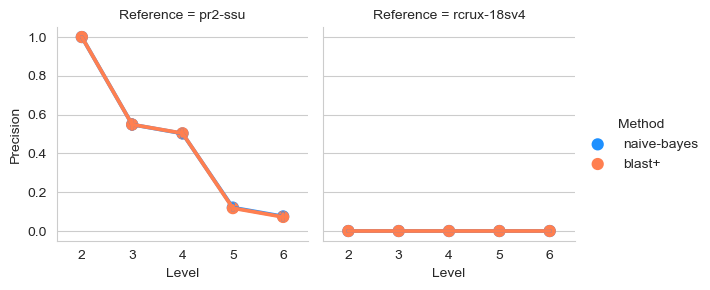

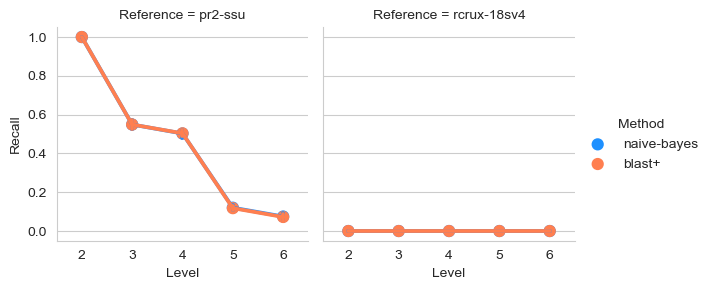

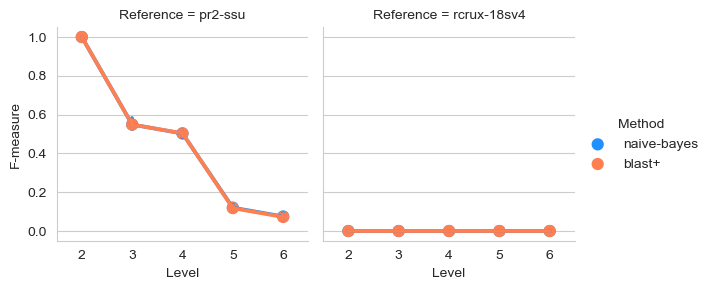

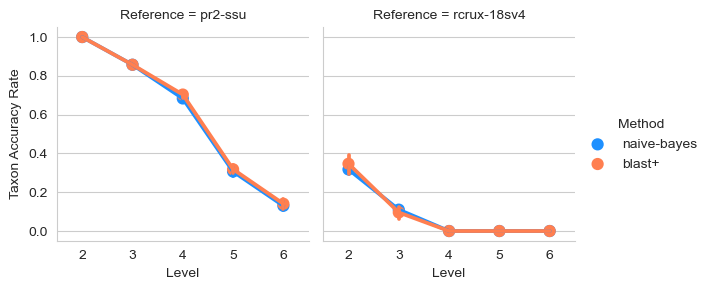

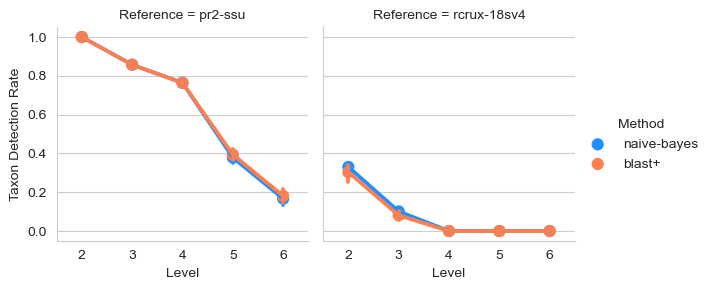

In [192]:
point = pointplot_from_data_frame(mock_results, "Level", y_vars, 
                                  group_by="Reference", color_by="Method",
                                  color_palette=color_palette_method)

In [193]:
# plots folder must already exist
for k, v in point.items():
    v.savefig(join(outdir, 'mock-{0}-lineplots.pdf'.format(k)))

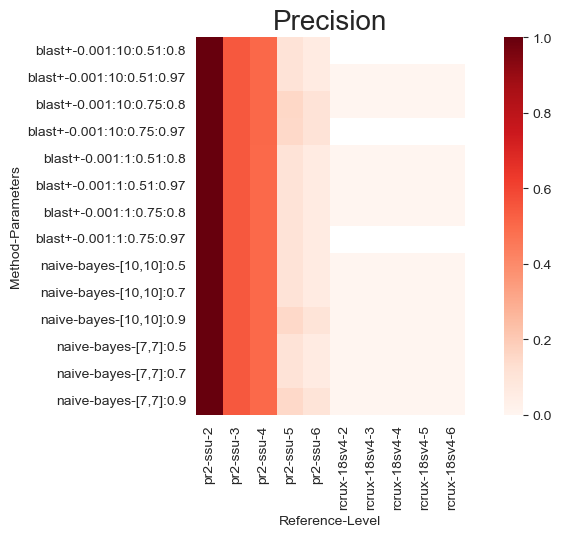

<AxesSubplot: title={'center': 'Precision'}, xlabel='Reference-Level', ylabel='Method-Parameters'>

In [194]:
heatmap_from_data_frame(mock_results, metric="Precision", rows=["Method", "Parameters"], cols=["Reference", "Level"])

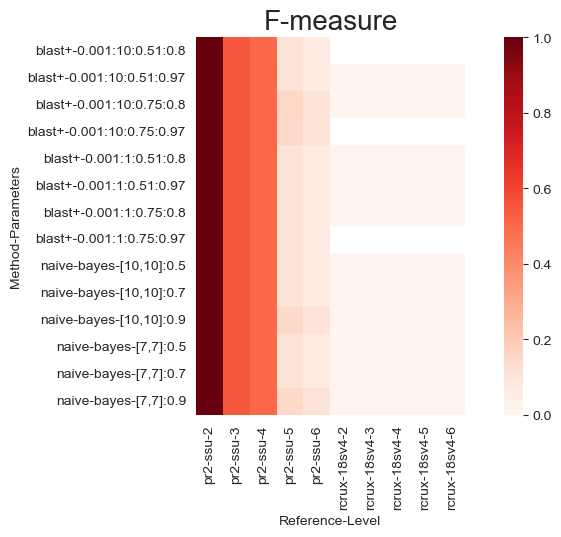

<AxesSubplot: title={'center': 'F-measure'}, xlabel='Reference-Level', ylabel='Method-Parameters'>

In [195]:
heatmap_from_data_frame(mock_results, metric="F-measure", rows=["Method", "Parameters"], cols=["Reference", "Level"])

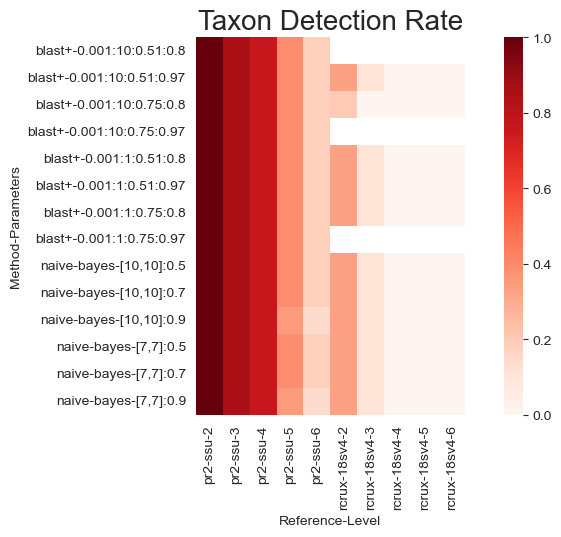

<AxesSubplot: title={'center': 'Taxon Detection Rate'}, xlabel='Reference-Level', ylabel='Method-Parameters'>

In [196]:
heatmap_from_data_frame(mock_results, metric="Taxon Detection Rate", rows=["Method", "Parameters"], cols=["Reference", "Level"])

### Focus on species level results (for genus level, change 6 to 5)

In [197]:
mock_results_6 = mock_results[mock_results['Level'] == 6]

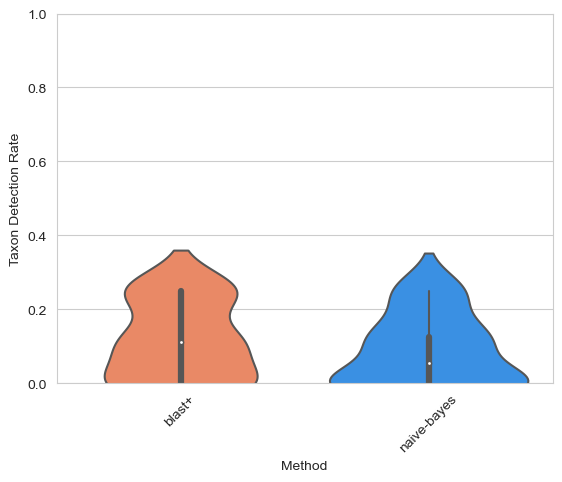

<AxesSubplot: xlabel='Method', ylabel='Taxon Detection Rate'>

In [198]:
boxplot_from_data_frame(mock_results_6, group_by="Method", metric="Taxon Detection Rate", color_palette=color_palette_method)

In [199]:
mock_results_6.groupby("Method").median()

/var/folders/_f/3hfwkwps2rq9q60vkv4fnd_n9rf1vk/T/ipykernel_50497/856066177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mock_results_6.groupby("Method").median()


,Level,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
Method,,,,,,
blast+,6.0,0.032484,0.032484,0.032484,0.090909,0.111111
naive-bayes,6.0,0.016242,0.016242,0.016242,0.045455,0.055556


In the following heatmaps, we assess accuracy rates in each dataset X method configuration combination. This allows us to assess how evenly configurations affect performance, whether specific mock communities outperform of underperform relative to others, and generally assess how increasing/decreasing specific parameters affects accuracy.

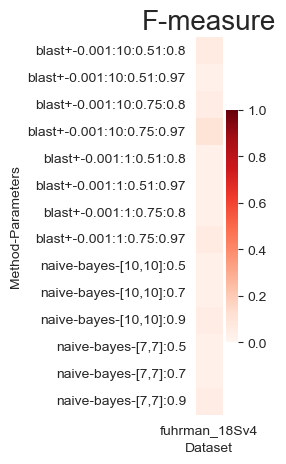

<AxesSubplot: title={'center': 'F-measure'}, xlabel='Dataset', ylabel='Method-Parameters'>

In [200]:
heatmap_from_data_frame(mock_results_6, "F-measure")

### Method optimization  
Which method/parameter configuration performed "best" for a given score? We can rank the top-performing configuration by dataset, method, and taxonomic level.

Now we can determine which parameter configuration performed best for each method. Count best values in each column indicate how many samples a given method achieved within one mean absolute deviation of the best result (which is why they may sum to more than the total number of samples).

In [201]:
for method in mock_results_6['Method'].unique():
    top_params = parameter_comparisons(
        mock_results_6, method, 
        metrics=['Taxon Accuracy Rate', 'Taxon Detection Rate', 'Precision', 'Recall', 'F-measure'])
    display(Markdown('## {0}'.format(method)))
    display(top_params[:5])

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_metric_value = m_res[metric].mad()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_metric_value = m_res[metric].mad()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_metric_value = m_res[metric].mad()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The '

## naive-bayes

,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
"[10,10]:0.9",2,2,2,2,2
"[7,7]:0.9",2,2,2,2,2
"[10,10]:0.5",2,2,1,1,1
"[7,7]:0.5",2,2,1,1,1
"[7,7]:0.7",2,2,1,1,1


/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_metric_value = m_res[metric].mad()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_metric_value = m_res[metric].mad()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_metric_value = m_res[metric].mad()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/eval_framework.py:60: FutureWarning: The '

## blast+

,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0.001:10:0.75:0.8,2,2,2.0,2.0,2.0
0.001:10:0.75:0.97,2,2,2.0,2.0,2.0
0.001:10:0.51:0.97,2,2,0.0,0.0,0.0
0.001:1:0.51:0.8,2,2,0.0,0.0,0.0
0.001:1:0.75:0.8,2,2,0.0,0.0,0.0


And, finally, which method performed best at each individual taxonomic level for each reference dataset (i.e., for across all fungal and bacterial mock communities combined)?

For this analysis, we rank the top-performing method/parameter combination for each method at family through species levels. Methods are ranked by top F-measure, and the average value for each metric is shown (rather than count best as above). F-measure distributions are plotted for each method, and compared using paired t-tests with FDR-corrected P-values. This cell does not need to be altered, unless if you wish to change the metric used for sorting best methods and for plotting.

## pr2-ssu level 4

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.763889,0.763889,0.505890,0.505890,0.505890
1,naive-bayes,"[10,10]:0.5",0.683333,0.763889,0.502776,0.502776,0.502776


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,-1.092406,0.471904,0.471904


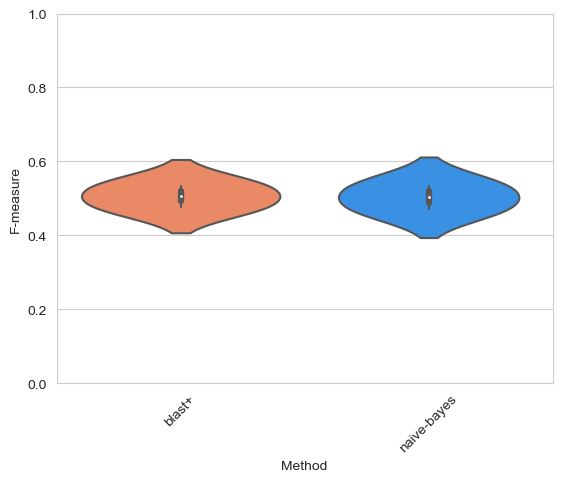

## pr2-ssu level 5

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.75:0.8,0.314935,0.393939,0.152626,0.152119,0.152372
1,naive-bayes,"[10,10]:0.9",0.290210,0.348485,0.149695,0.147860,0.148764


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,-0.096171,0.938963,0.938963


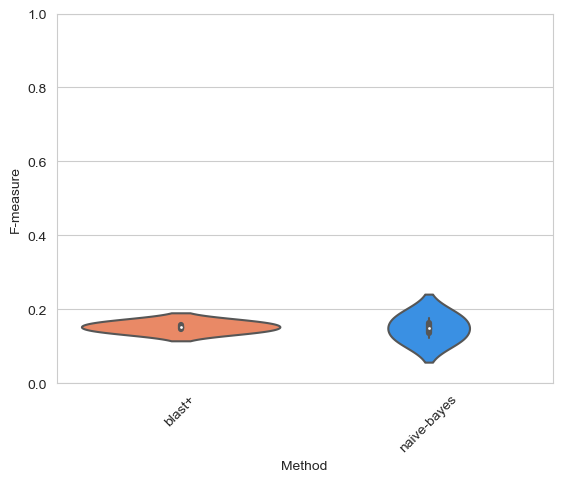

## pr2-ssu level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.75:0.8,0.139205,0.180556,0.107043,0.106619,0.106830
1,naive-bayes,"[10,10]:0.9",0.112121,0.138889,0.103818,0.102360,0.103078


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,-0.099618,0.93679,0.93679


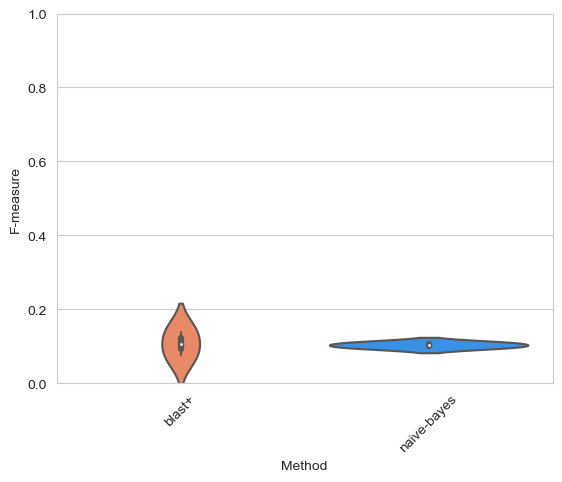

## rcrux-18sv4 level 4

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


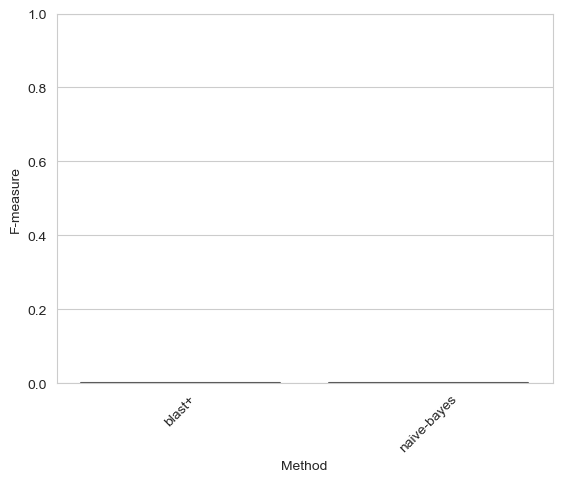

## rcrux-18sv4 level 5

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


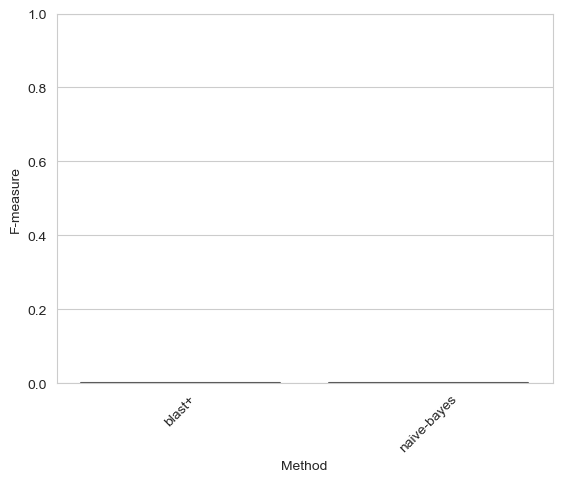

## rcrux-18sv4 level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


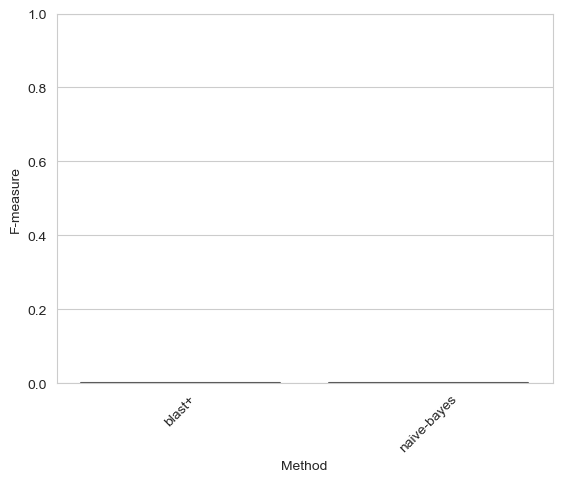

In [202]:
boxes = rank_optimized_method_performance_by_dataset(mock_results,
                                                     dataset="Reference",
                                                     metric="F-measure",
                                                     level_range=range(4,7),
                                                     display_fields=["Method",
                                                                     "Parameters",
                                                                     "Taxon Accuracy Rate",
                                                                     "Taxon Detection Rate",
                                                                     "Precision",
                                                                     "Recall",
                                                                     "F-measure"],
                                                     paired=True,
                                                     parametric=True,
                                                     color=None,
                                                     color_palette=color_palette_method)

In [203]:
# save plots

for k, v in boxes.items():
    v.get_figure().savefig(join(outdir, 'mock-fmeasure-{0}-boxplots.pdf'.format(k)))

## Taxon Accuracy Rate

## pr2-ssu level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.150000,0.180556,0.060928,0.060928,0.060928
1,naive-bayes,"[10,10]:0.5",0.139205,0.180556,0.060928,0.060928,0.060928


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,-6.333333,0.099696,0.099696


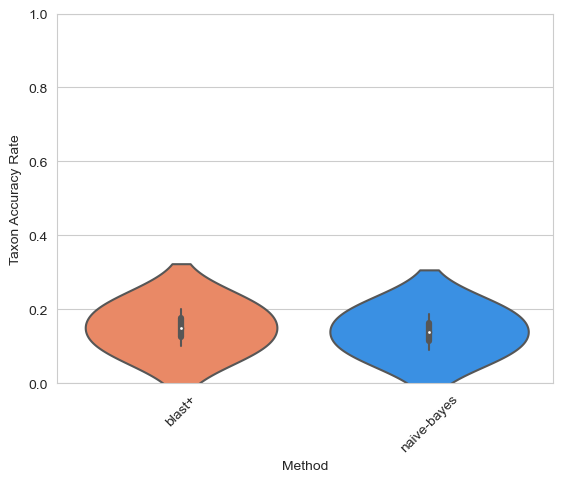

## rcrux-18sv4 level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


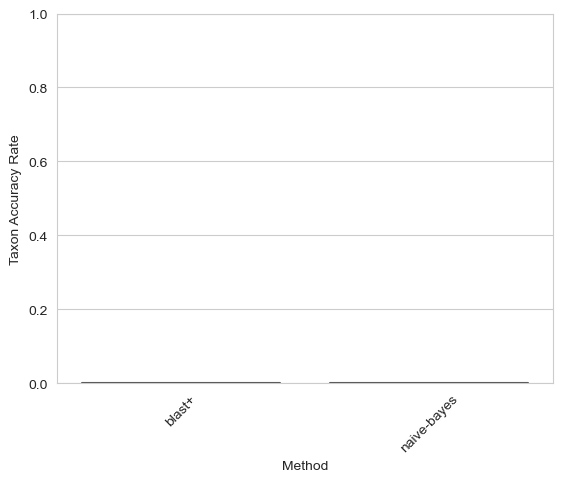

## Taxon Detection Rate

## pr2-ssu level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.8,0.139205,0.180556,0.061200,0.060928,0.061064
1,naive-bayes,"[10,10]:0.5",0.139205,0.180556,0.060928,0.060928,0.060928


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


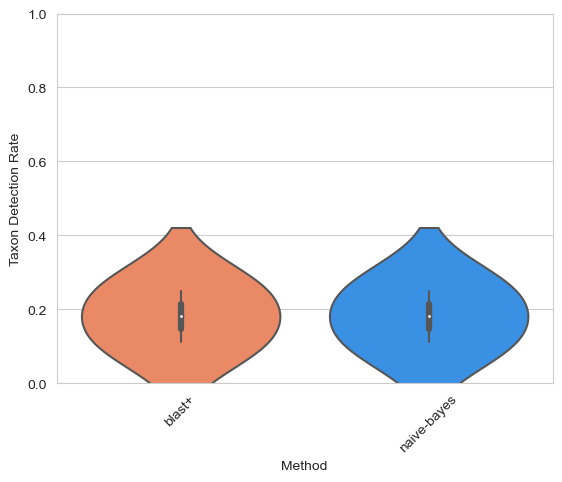

## rcrux-18sv4 level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


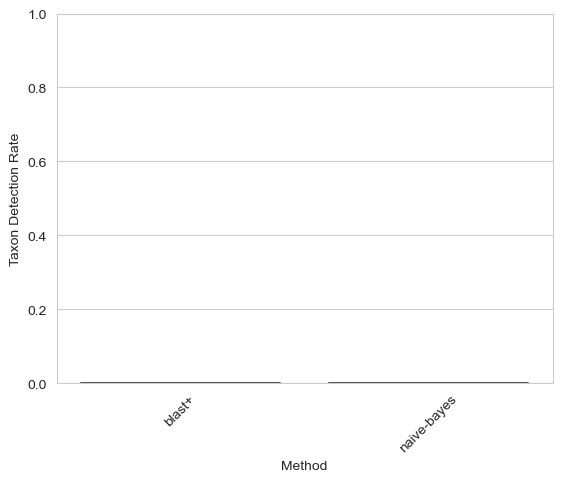

## Precision

## pr2-ssu level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.75:0.8,0.139205,0.180556,0.107043,0.106619,0.106830
1,naive-bayes,"[10,10]:0.9",0.112121,0.138889,0.103818,0.102360,0.103078


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,-0.086859,0.944843,0.944843


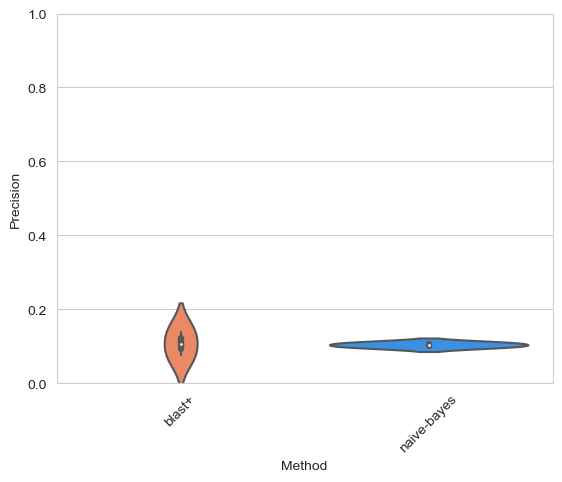

## rcrux-18sv4 level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


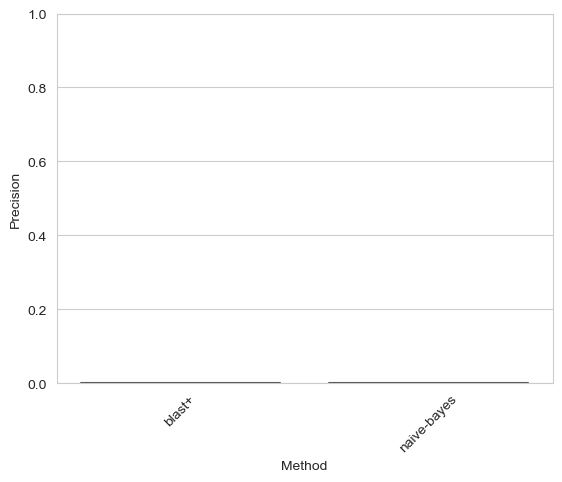

## Recall

## pr2-ssu level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.75:0.8,0.139205,0.180556,0.107043,0.106619,0.106830
1,naive-bayes,"[10,10]:0.9",0.112121,0.138889,0.103818,0.102360,0.103078


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,-0.111538,0.929285,0.929285


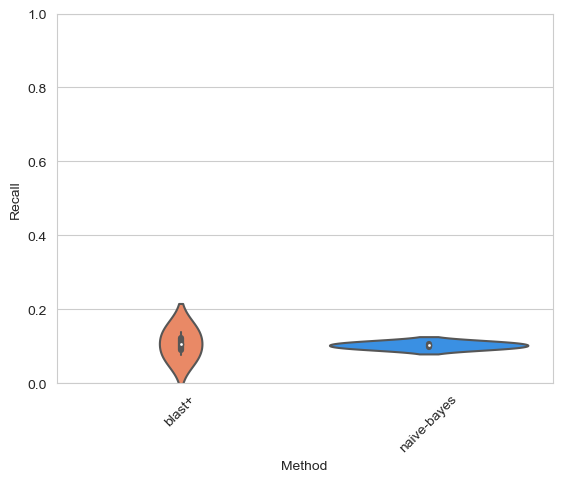

## rcrux-18sv4 level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


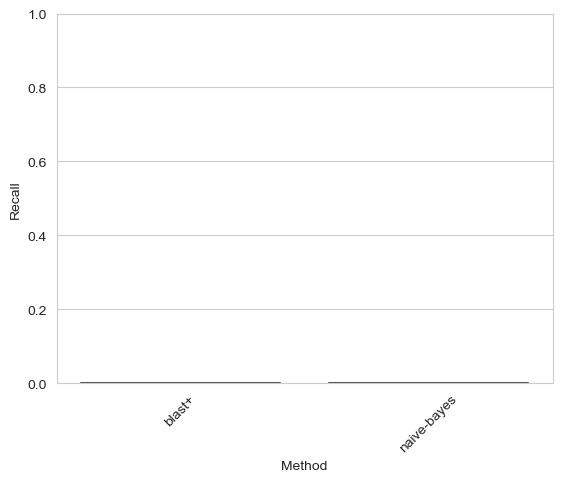

## F-measure

## pr2-ssu level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.75:0.8,0.139205,0.180556,0.107043,0.106619,0.106830
1,naive-bayes,"[10,10]:0.9",0.112121,0.138889,0.103818,0.102360,0.103078


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,-0.099618,0.93679,0.93679


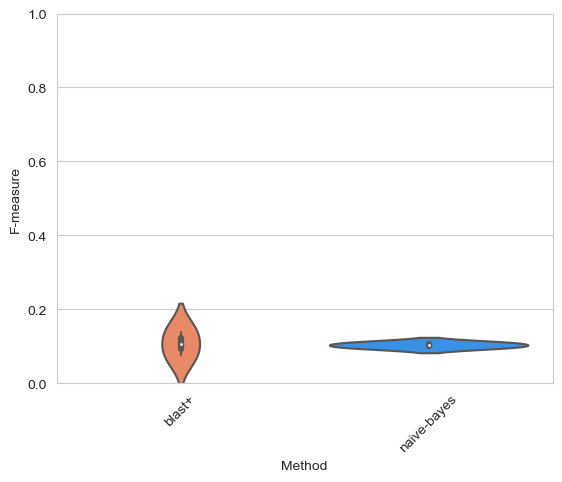

## rcrux-18sv4 level 6

/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:744: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = subset.groupby(params).mean().reset_index()
/Users/katherine.silliman/Projects/NOAA/rcrux_taxcredit_metro/tax_credit/plotting_functions.py:549: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
0,blast+,0.001:10:0.51:0.97,0.0,0.0,0.0,0.0,0.0
1,naive-bayes,"[10,10]:0.5",0.0,0.0,0.0,0.0,0.0


,,stat,P,FDR P
Method A,Method B,,,
naive-bayes,blast+,NaN,NaN,NaN


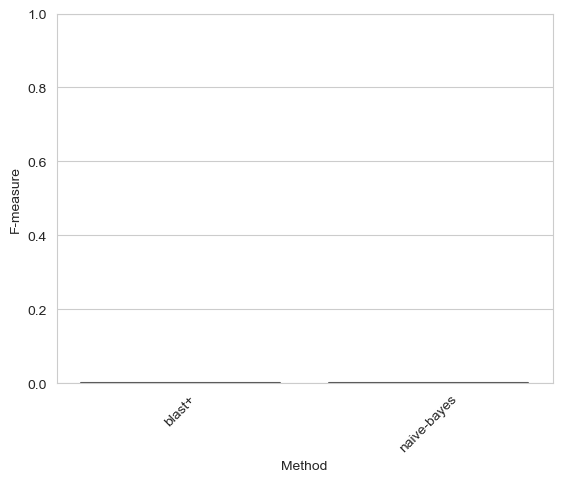

In [204]:
for metric in ["Taxon Accuracy Rate", "Taxon Detection Rate", "Precision", "Recall", "F-measure"]:
    display(Markdown('## {0}'.format(metric)))
    boxes = rank_optimized_method_performance_by_dataset(mock_results,
                                                         dataset="Reference",
                                                         metric=metric,
                                                         level_range=range(6,7),
                                                         display_fields=["Method",
                                                                         "Parameters",
                                                                         "Taxon Accuracy Rate",
                                                                         "Taxon Detection Rate",
                                                                         "Precision",
                                                                         "Recall",
                                                                         "F-measure"],
                                                         paired=True,
                                                         parametric=True,
                                                         color=None,
                                                         color_palette=color_palette_method)
    for k, v in boxes.items():
        v.get_figure().savefig(join(outdir, 'mock-{0}-{1}-boxplots.pdf'.format(metric, k)))

### Testing code, not needed for actiually running

In [ ]:
from biom import load_table, Table
from biom.cli.util import write_biom_table
from biom.parse import MetadataMap
from os import makedirs, remove, system, stat

def add_metadata_to_biom_table(biom_input_fp, taxonomy_map_fp, biom_output_fp):
    '''Load biom, add metadata, write to new table'''
    newbiom = load_table(biom_input_fp)
    if stat(taxonomy_map_fp).st_size == 0:
        metadata = {}
    else:
        metadata = MetadataMap.from_file(
            taxonomy_map_fp, header=['Sample ID', 'taxonomy', 'c'])
            #taxonomy_map_fp, header=['Sample ID', 'taxonomy', 'c'])
        print(metadata)
    newbiom.add_metadata(metadata, 'observation')
    write_biom_table(newbiom, 'json', biom_output_fp)

In [ ]:
newbiom = load_table("data/mock-community/fuhrman_18Sv4/feature_table.biom")
print(newbiom)

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
ASV_1	32153.0	73024.0
ASV_2	14255.0	30957.0
ASV_3	8565.0	4849.0
ASV_4	6109.0	5246.0
ASV_5	3404.0	7127.0
ASV_6	0.0	8738.0
ASV_7	4960.0	3494.0
ASV_8	2001.0	2873.0
ASV_9	0.0	4332.0
ASV_10	0.0	3816.0
ASV_11	3280.0	328.0
ASV_12	2590.0	12.0
ASV_13	2393.0	20.0
ASV_14	21.0	873.0
ASV_15	0.0	424.0
ASV_16	0.0	265.0


In [ ]:
newbiom = load_table("data/mock-community/fuhrman_18Sv4/feature_table.biom").to_dataframe()
newbiom

,MP_ERR3712072,MP_ERR3712077
ASV_1,32153.0,73024.0
ASV_2,14255.0,30957.0
ASV_3,8565.0,4849.0
ASV_4,6109.0,5246.0
ASV_5,3404.0,7127.0
ASV_6,0.0,8738.0
ASV_7,4960.0,3494.0
ASV_8,2001.0,2873.0
ASV_9,0.0,4332.0
ASV_10,0.0,3816.0


In [ ]:
metadata = pd.read_csv("analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/query_tax_assignments.txt",sep="\t",index_col=0)
metadata.head()

,Taxon,Consensus
Feature ID,,
ASV_1,Eukaryota;Haptista;Haptophyta;Haptophyta_X;Pry...,1.0
ASV_10,Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndin...,1.0
ASV_11,Eukaryota;TSAR;Alveolata;Ciliophora;Spirotrich...,1.0
ASV_12,Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinoph...,1.0
ASV_13,Eukaryota;Obazoa;Opisthokonta;Metazoa;Arthropo...,1.0


In [ ]:
merged = newbiom.merge(metadata, left_index=True, right_on="Feature ID")
merged.rename(columns={'Taxon': 'taxonomy'}, inplace=True)
merged.drop(columns=['Consensus'], inplace=True)
merged.head()


,MP_ERR3712072,MP_ERR3712077,taxonomy
Feature ID,,,
ASV_1,32153.0,73024.0,Eukaryota;Haptista;Haptophyta;Haptophyta_X;Pry...
ASV_2,14255.0,30957.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndin...
ASV_3,8565.0,4849.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndin...
ASV_4,6109.0,5246.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinoph...
ASV_5,3404.0,7127.0,Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodi...


In [ ]:
merged.to_csv("analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/feature_w_taxa.tsv", sep="\t")

/var/folders/_f/3hfwkwps2rq9q60vkv4fnd_n9rf1vk/T/ipykernel_22996/1534377717.py:1: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  merged.to_csv("analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/feature_w_taxa.tsv", sep="\t")


In [ ]:
! biom convert -i analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/feature_w_taxa.tsv -o analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/feature_w_taxa.biom --to-hdf5 --table-type="OTU table" --process-obs-metadata taxonomy

In [ ]:
taxtaxbiom = load_table("data/mock-community/fuhrman_18Sv4/rcrux-18sv4/expected/table.L7.biom")
print(taxtaxbiom)

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
Eukaryota;Haptophyta;Prymnesiales__c;Prymnesiales;NA;NA;NA	0.40326849	0.498872781
Eukaryota;Dinophyceae__p;Dinophyceae;Syndiniales;NA;NA;NA	0.286212389	0.270682753
Eukaryota;Dinophyceae__p;Dinophyceae;NA;NA;NA;NA	0.076620135	0.035838719
Eukaryota;Bacillariophyta;Coscinodiscophyceae;NA;NA;NA;NA	0.042693557	0.048689011
Eukaryota;Dinophyceae__p;Dinophyceae;Gonyaulacales;Lingulodiniaceae;Lingulodinium;NA	0.0	0.059694763
Eukaryota;Polycystinea__p;Polycystinea;Spumellaria;Litheliidae;Larcopyle;NA	0.062209178	0.023869707
Eukaryota;Cercozoa;Thecofilosea;Cryomonadida;NA;NA;NA	0.025096888	0.019627266
Eukaryota;Dinophyceae__p;Dinophyceae;Gymnodiniales;Gymnodiniaceae;Gymnodinium;NA	0.0	0.029594611
Eukaryota;Alveolata;Spirotrichea;Oligotrichida;NA;NA;NA	0.041138328	0.002240774
Eukaryota;Dinophyceae__p;Dinophyceae;Gonyaulacales;Ceratiaceae;Neoceratium;NA	0.032484228	8.19795e-05
Eukaryota;Arthropoda;NA;NA;NA;NA;NA	0.03001342	0.000136633

In [ ]:
taxbiom = load_table("analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/feature_w_taxa.biom")
print(taxbiom)

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
ASV_1	32153.0	73024.0
ASV_2	14255.0	30957.0
ASV_3	8565.0	4849.0
ASV_4	6109.0	5246.0
ASV_5	3404.0	7127.0
ASV_6	0.0	8738.0
ASV_7	4960.0	3494.0
ASV_8	2001.0	2873.0
ASV_9	0.0	4332.0
ASV_10	0.0	3816.0
ASV_11	3280.0	328.0
ASV_12	2590.0	12.0
ASV_13	2393.0	20.0
ASV_14	21.0	873.0
ASV_15	0.0	424.0
ASV_16	0.0	265.0


In [ ]:
merged.loc["merged.values"].values

/var/folders/_f/3hfwkwps2rq9q60vkv4fnd_n9rf1vk/T/ipykernel_22996/802251557.py:1: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  merged.values


array([[32153.0, 73024.0,
        'Eukaryota;Haptista;Haptophyta;Haptophyta_X;Prymnesiophyceae;Prymnesiales;Chrysochromulinaceae;Chrysochromulina;Chrysochromulina_sp.;',
        1.0],
       [14255.0, 30957.0,
        'Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;Dino-Group-II;Dino-Group-II-Clade-3;Dino-Group-II-Clade-3_X;Dino-Group-II-Clade-3_X_sp.;',
        1.0],
       [8565.0, 4849.0,
        'Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;Dino-Group-I;Dino-Group-I-Clade-5;Dino-Group-I-Clade-5_X;Dino-Group-I-Clade-5_X_sp.;',
        1.0],
       [6109.0, 5246.0,
        'Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Dinophyceae_X;Dinophyceae_XX;Dinophyceae_XXX;Dinophyceae_XXX_sp.;',
        1.0],
       [3404.0, 7127.0,
        'Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodiscophyceae;Rhizosoleniales;Rhizosoleniaceae;Guinardia;Guinardia_striata;',
        1.0],
       [0, 8738.0,
        'Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Lingulodi

In [ ]:
table = Table(merged.values, merged.index, merged.columns)
print(table)

/var/folders/_f/3hfwkwps2rq9q60vkv4fnd_n9rf1vk/T/ipykernel_22996/3518007311.py:1: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  table = Table(merged.values, merged.index, merged.columns)


ValueError: could not convert string to float: 'Eukaryota;Haptista;Haptophyta;Haptophyta_X;Prymnesiophyceae;Prymnesiales;Chrysochromulinaceae;Chrysochromulina;Chrysochromulina_sp.;'

In [ ]:
from biom import load_table, Table
from biom.cli.util import write_biom_table
from biom.parse import MetadataMap
from os import makedirs, remove, system, stat

newbiom = load_table("data/mock-community/fuhrman_18Sv4/feature_table.biom")
if stat("analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/query_tax_assignments.txt").st_size == 0:
    metadata = {}
else:
    metadata = MetadataMap.from_file(
        "analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/query_tax_assignments.txt", header=['Sample ID', 'taxonomy', 'c'])
            #taxonomy_map_fp, header=['Sample ID', 'taxonomy', 'c'])
    print(metadata)

{'Feature ID': {'taxonomy': 'Taxon', 'c': 'Consensus'}, 'ASV_1': {'taxonomy': 'Eukaryota;Haptista;Haptophyta;Haptophyta_X;Prymnesiophyceae;Prymnesiales;Chrysochromulinaceae;Chrysochromulina;Chrysochromulina_sp.;', 'c': '1.0'}, 'ASV_10': {'taxonomy': 'Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;Dino-Group-II;Dino-Group-II-Clade-10-and-11;Dino-Group-II-Clade-10-and-11_X;Dino-Group-II-Clade-10-and-11_X_sp.;', 'c': '1.0'}, 'ASV_11': {'taxonomy': 'Eukaryota;TSAR;Alveolata;Ciliophora;Spirotrichea;Oligotrichida;Oligotrichida_X;Oligotrichida_XX;Oligotrichida_XX_sp.;', 'c': '1.0'}, 'ASV_12': {'taxonomy': 'Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Ceratiaceae;Tripos;Tripos_declinatus;', 'c': '1.0'}, 'ASV_13': {'taxonomy': 'Eukaryota;Obazoa;Opisthokonta;Metazoa;Arthropoda;Crustacea;Maxillopoda;Paracalanus;Paracalanus_parvus;', 'c': '1.0'}, 'ASV_14': {'taxonomy': 'Eukaryota;TSAR;Stramenopiles;Gyrista;Mediophyceae;Chaetocerotales;Leptocylindraceae;Leptocylindrus;Lept

In [ ]:
newbiom.add_metadata(metadata, 'observation')
print(newbiom)

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
ASV_1	32153.0	73024.0
ASV_2	14255.0	30957.0
ASV_3	8565.0	4849.0
ASV_4	6109.0	5246.0
ASV_5	3404.0	7127.0
ASV_6	0.0	8738.0
ASV_7	4960.0	3494.0
ASV_8	2001.0	2873.0
ASV_9	0.0	4332.0
ASV_10	0.0	3816.0
ASV_11	3280.0	328.0
ASV_12	2590.0	12.0
ASV_13	2393.0	20.0
ASV_14	21.0	873.0
ASV_15	0.0	424.0
ASV_16	0.0	265.0


In [ ]:
newbiom = load_table("analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.97/table.biom")
newbiom.metadata_to_dataframe('observation')

,c,taxonomy
ASV_1,1.0,Eukaryota;Haptista;Haptophyta;Haptophyta_X;Pry...
ASV_2,1.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndin...
ASV_3,1.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndin...
ASV_4,1.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinoph...
ASV_5,1.0,Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodi...
ASV_6,1.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinoph...
ASV_7,1.0,Eukaryota;TSAR;Rhizaria;Radiolaria;RAD-B;RAD-B...
ASV_8,1.0,Eukaryota;TSAR;Rhizaria;Cercozoa;Filosa-Thecof...
ASV_9,1.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinoph...
ASV_10,1.0,Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndin...


In [ ]:
newbiom = load_table("data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/table.L7.biom")
newbiom.metadata_to_dataframe('observation')

KeyError: 'observation does not have metadata'

In [ ]:
add_metadata_to_biom_table("data/mock-community/fuhrman_18Sv4/feature_table.biom","analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/query_tax_assignments.txt","analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.8/table.biom")

{'Feature ID': {'taxonomy': 'Taxon', 'c': 'Consensus'}, 'ASV_1': {'taxonomy': 'Eukaryota;Haptista;Haptophyta;Haptophyta_X;Prymnesiophyceae;Prymnesiales;Chrysochromulinaceae;Chrysochromulina;Chrysochromulina_sp.;', 'c': '1.0'}, 'ASV_10': {'taxonomy': 'Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;Dino-Group-II;Dino-Group-II-Clade-10-and-11;Dino-Group-II-Clade-10-and-11_X;Dino-Group-II-Clade-10-and-11_X_sp.;', 'c': '1.0'}, 'ASV_11': {'taxonomy': 'Eukaryota;TSAR;Alveolata;Ciliophora;Spirotrichea;Oligotrichida;Oligotrichida_X;Oligotrichida_XX;Oligotrichida_XX_sp.;', 'c': '1.0'}, 'ASV_12': {'taxonomy': 'Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Ceratiaceae;Tripos;Tripos_declinatus;', 'c': '1.0'}, 'ASV_13': {'taxonomy': 'Eukaryota;Obazoa;Opisthokonta;Metazoa;Arthropoda;Crustacea;Maxillopoda;Paracalanus;Paracalanus_parvus;', 'c': '1.0'}, 'ASV_14': {'taxonomy': 'Eukaryota;TSAR;Stramenopiles;Gyrista;Mediophyceae;Chaetocerotales;Leptocylindraceae;Leptocylindrus;Lept

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
from biom.table import Table
data = np.asarray([[0, 0, 1], [1, 3, 42]])
table = Table(data, ['O1', 'O2'], ['S1', 'S2', 'S3'],
              [{'full_genome_available': True},
               {'full_genome_available': False}],
              [{'sample_type': 'a'}, {'sample_type': 'a'},
               {'sample_type': 'b'}])
table.metadata('01','sa')

<bound method Table.metadata of 2 x 3 <class 'biom.table.Table'> with 4 nonzero entries (66% dense)>

In [ ]:
from biom import example_table
example_table.metadata_to_dataframe('observation')

,taxonomy_0,taxonomy_1
O1,Bacteria,Firmicutes
O2,Bacteria,Bacteroidetes


In [ ]:
print(example_table)

# Constructed from biom file
#OTU ID	S1	S2	S3
O1	0.0	1.0	2.0
O2	3.0	4.0	5.0


Test mount_observbations

In [ ]:
def mount_observations(table_fp, min_count=0, taxonomy_level=6,
                       taxa_to_keep=None, md_key='taxonomy', normalize=True,
                       clean_obs_ids=True, filter_obs=True):
    '''load biom table, filter by abundance, collapse taxonomy, return biom.

    table_fp: path
        Input biom table.
    min_count: int
        Minimum abundance threshold; features detected at lower abundance are
        removed from table.
    taxonomy_level: int
        Taxonomic level at which to collapse table.
    taxa_to_keep: list of taxonomies to retain, others are removed before
        evaluation.
    md_key: str
        biom observation metadata key on which to collapse and filter.
    normalize: bool
        Normalize table to relative abundance across sample rows?
    clean_obs_ids: bool
        Remove '[]()' characters from observation ids? (these are removed from
        the ref db during filtering/cleaning steps, and should be removed from
        expected taxonomy files to avoid mismatches).
    filter_obs: bool
        Filter observations? filter_table will remove observations if taxonomy
        strings are shorter than taxonomic_level, count is less than min_count,
        or observation is not included in taxa_to_keep.
    '''
    try:
        table = load_table(table_fp)
    except ValueError:
        raise ValueError("Couldn't parse BIOM table: {0}".format(table_fp))

    if filter_obs is True and min_count > 0 and taxa_to_keep is not None:
        try:
            table = filter_table(table, min_count, taxonomy_level,
                                 taxa_to_keep, md_key=md_key)
        except TableException:
            # if all data is filtered out, move on to the next table
            pass

        except TypeError:
            print("Missing taxonomic information in table " + table_fp)

        if table.is_empty():
            raise ValueError("Table is empty after filtering at"
                             " {0}".format(table_fp))

    collapse_taxonomy = get_taxonomy_collapser(taxonomy_level, md_key=md_key)

    try:
        table = table.collapse(collapse_taxonomy, axis='observation',
                               min_group_size=1)
    except TableException:
        raise TableException("Failure to collapse taxonomy for table at:"
                             " {0}".format(table_fp))
    except TypeError:
        raise TypeError("Failure to collapse taxonomy: {0}".format(table_fp))

    if normalize is True:
        table.norm(axis='sample')

    return table

def get_taxonomy_collapser(level, md_key='taxonomy',
                           unassignable_label='unassigned'):
    """ Returns fn to pass to table.collapse

        level: the level to collapse on in the "taxonomy" observation
         metdata category

    """
    def f(id_, md):
        try:
            levels = [l.strip() for l in md[md_key].split(';')]
        except AttributeError:
            try:
                levels = [l.strip() for l in md[md_key]]
            # if no metadata is listed for observation, group as Unassigned
            except TypeError:
                levels = [unassignable_label]
        # this happens if the table is empty
        except TypeError:
            levels = [unassignable_label]
        result = ';'.join(levels[:level+1])
        return result
    return f


def filter_table(table, min_count=0, taxonomy_level=None,
                 taxa_to_keep=None, md_key='taxonomy'):
    try:
        _taxa_to_keep = ';'.join(taxa_to_keep)
    except TypeError:
        _taxa_to_keep = None

    def f(data_vector, id_, metadata):
        # if filtering based on number of taxonomy levels, and this
        # observation has taxonomic information, and
        # there are a sufficient number of taxonomic levels
        # Table filtering here removed taxa that have insufficient levels
        enough_levels = taxonomy_level is None or \
                        (metadata[md_key] is not None and
                         len(metadata[md_key]) >= taxonomy_level+1)
        # if filtering to specific taxa, this OTU is assigned to that taxonomy
        allowed_taxa = _taxa_to_keep is None or \
            id_.startswith(_taxa_to_keep) or \
            (metadata is not None and md_key in metadata and
             ';'.join(metadata[md_key]).startswith(_taxa_to_keep))
        # the count of this observation is at least min_count
        sufficient_count = data_vector.sum() >= min_count
        return sufficient_count and allowed_taxa and enough_levels

    return table.filter(f, axis='observation', inplace=False)

In [ ]:
# expected
table_fp="data/mock-community/fuhrman_18Sv4/pr2-ssu/expected/table.L7.biom"
min_count=0
taxonomy_level=3
taxa_to_keep=None
md_key='taxonomy'
normalize=True
clean_obs_ids=True
filter_obs=False

In [ ]:
table = load_table(table_fp)

if filter_obs is True and min_count > 0 and taxa_to_keep is not None:
    print("yes")

In [ ]:
print(table)

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
Eukaryota;Haptista;Haptophyta;NA;Prymnesiophyceae;Prymnesiales;NA;NA;NA	32153.0	73024.0
Eukaryota;TSAR;Alveolata;Dinoflagellata;Syndiniales;NA;NA;NA;NA	22820.0	39622.0
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;NA;NA;NA;NA	6109.0	5246.0
Eukaryota;TSAR;Stramenopiles;Gyrista;Coscinodiscophyceae;NA;NA;NA;NA	3404.0	7127.0
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Lingulodiniaceae;Lingulodinium;NA	0.0	8738.0
Eukaryota;TSAR;Rhizaria;Radiolaria;Polycystinea;Spumellaria;Pyloniidae;Larcopyle;NA	4960.0	3494.0
Eukaryota;TSAR;Rhizaria;Cercozoa;Filosa-Thecofilosea;Cryomonadida;NA;NA;NA	2001.0	2873.0
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gymnodiniales;Gymnodiniaceae;Gymnodinium;NA	0.0	4332.0
Eukaryota;TSAR;Alveolata;Ciliophora;Spirotrichea;Oligotrichida;NA;NA;NA	3280.0	328.0
Eukaryota;TSAR;Alveolata;Dinoflagellata;Dinophyceae;Gonyaulacales;Ceratiaceae;Neoceratium;NA	2590.0	12.0
Eukaryota;O

In [ ]:
collapse_taxonomy = get_taxonomy_collapser(3, md_key=md_key)

In [ ]:
table_c = table.collapse(collapse_taxonomy, axis='observation',
                               min_group_size=1)

In [ ]:
print(table_c)  

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
unassigned	5695.071428571428	10455.57142857143


In [ ]:
if normalize is True:
    print("yes")
    table_c.norm(axis='sample')
else:
    print("no")

yes


In [ ]:
# actual
table_fp="analyses/mock-community/fuhrman_18Sv4/pr2-ssu/blast+/0.001:1:0.51:0.97/table.biom"
min_count=1
taxonomy_level=3
taxa_to_keep=None
md_key='taxonomy'
normalize=True
clean_obs_ids=True
filter_obs=True

In [ ]:
table = load_table(table_fp)

if filter_obs is True and min_count > 0 and taxa_to_keep is not None:
    print("yes")

In [ ]:
print(table)

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
ASV_1	32153.0	73024.0
ASV_2	14255.0	30957.0
ASV_3	8565.0	4849.0
ASV_4	6109.0	5246.0
ASV_5	3404.0	7127.0
ASV_6	0.0	8738.0
ASV_7	4960.0	3494.0
ASV_8	2001.0	2873.0
ASV_9	0.0	4332.0
ASV_10	0.0	3816.0
ASV_11	3280.0	328.0
ASV_12	2590.0	12.0
ASV_13	2393.0	20.0
ASV_14	21.0	873.0
ASV_15	0.0	424.0
ASV_16	0.0	265.0


In [ ]:
table_c = table.collapse(collapse_taxonomy, axis='observation',
                               min_group_size=1)

In [ ]:
print(table_c)  

# Constructed from biom file
#OTU ID	MP_ERR3712072	MP_ERR3712077
Eukaryota;Haptista;Haptophyta;Haptophyta_X	32153.0	73024.0
Eukaryota;TSAR;Alveolata;Dinoflagellata	3939.875	7276.875
Eukaryota;TSAR;Stramenopiles;Gyrista	1712.5	4000.0
Eukaryota;TSAR;Rhizaria;Radiolaria	4960.0	3494.0
Eukaryota;TSAR;Rhizaria;Cercozoa	2001.0	2873.0
Eukaryota;TSAR;Alveolata;Ciliophora	1640.0	376.0
Eukaryota;Obazoa;Opisthokonta;Metazoa	2393.0	20.0
